In [12]:
import cv2
import numpy as np

# Đọc ảnh vào
imgpath = "/content/01.png"
img = cv2.imread(imgpath, 0)

In [13]:
import os
def get_size_in_bytes(file_path):
   #Nhận kích thước của tệp tại đường dẫn nhất định tính bằng byte
   size = os.path.getsize(file_path)
   return size

In [14]:
size_org = get_size_in_bytes(imgpath)
size_org

52294

In [15]:
# Tính toán mean theo hàng
M = np.mean(img.T, axis=1)

# Trừ cho mean
C = img - M

# Ma trận hiệp phương sai
V = np.cov(C.T)

# Giá trị riêng và vector riêng của ma trận hiệp phương sai
values, vectors = np.linalg.eig(V)

#p = np.size(vectors, axis =1)

# Sorting the eigen values in ascending order
idx = np.argsort(values)
idx = idx[::-1]

# Sorting eigen vectors
vectors = vectors[:,idx]
values = values[idx]



In [16]:
np.size(vectors, axis =1)

256

In [17]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

MSE:180.15264892578125


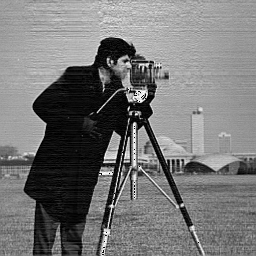

In [18]:
# PCs used for reconstruction (can be varied)
num_PC = 180

#Lấy các thành phần
#if num_PC <p or num_PC >0:
#	vectors = vectors[:, range(num_PC)]

# Khôi phục lại ảnh với các thành phần chính lựa chọn
#score = np.dot(vectors.T, C)
#constructed_img = np.dot(vectors, score) + M
#constructed_img = np.uint8(np.absolute(constructed_img))

# Hiển thị
#from google.colab.patches import cv2_imshow
#cv2_imshow(constructed_img)

#for i in range(num_PC,num_PC+1):
vectors= vectors[:, range(num_PC)]
score = np.dot(vectors.T, C)
constructed_img = np.dot(vectors, score) + M
constructed_img = np.uint8(np.absolute(constructed_img))
#print("Số thành phần chính:"+str(i))
print("MSE:"+str(mse(constructed_img,img)))
# Hiển thị
from google.colab.patches import cv2_imshow
cv2_imshow(constructed_img)

In [19]:
cv2.imwrite("compressed.png", constructed_img)
size1=get_size_in_bytes("/content/compressed.png")
size1

47838

In [20]:
size_org

52294

In [21]:
100*(1-size1/size_org)

8.521054040616516